## **Pre-Processing**

The pre-processing section of this project involves fetching and transforming raw data from multiple sources into a uniform format ready for analysis. This includes converting date columns to datetime objects, sorting the data in chronological order, and filtering the datasets to a consistent three-year period. Additionally, key metrics such as daily returns and cumulative returns are calculated to normalize the data.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mftool import Mftool
import streamlit as st
import plotly.express as px

In [77]:
mf = Mftool()

In [3]:
# Fetch all available mutual fund schemes
all_schemes = mf.get_scheme_codes()

In [4]:
# List to store data
data_list = []

In [5]:
import time

In [6]:
# Get all Small Cap Fund scheme codes and names
small_cap_schemes = mf.get_available_schemes("Small Cap Fund")

In [7]:
small_cap_schemes

{'105804': 'Aditya Birla Sun Life Small Cap Fund - GROWTH',
 '119556': 'Aditya Birla Sun Life Small Cap Fund - Growth - Direct Plan',
 '119557': 'Aditya Birla Sun Life Small Cap Fund -Direct - IDCW',
 '105805': 'Aditya Birla Sun Life Small Cap Fund -Regular - IDCW',
 '125354': 'Axis Small Cap Fund - Direct Plan - Growth',
 '125351': 'Axis Small Cap Fund - Direct Plan - IDCW',
 '125350': 'Axis Small Cap Fund - Regular Plan - Growth',
 '125352': 'Axis Small Cap Fund - Regular Plan - IDCW',
 '147946': 'BANDHAN SMALL CAP FUND - DIRECT PLAN GROWTH',
 '147943': 'BANDHAN SMALL CAP FUND - DIRECT PLAN IDCW',
 '147944': 'BANDHAN SMALL CAP FUND - REGULAR PLAN GROWTH',
 '147945': 'BANDHAN SMALL CAP FUND - REGULAR PLAN IDCW',
 '145678': 'BANK OF INDIA Small Cap Fund Direct Plan Growth',
 '145675': 'BANK OF INDIA Small Cap Fund Direct Plan IDCW',
 '145677': 'BANK OF INDIA Small Cap Fund Regular Plan Growth',
 '145676': 'BANK OF INDIA Small Cap Fund Regular Plan IDCW',
 '152128': 'Baroda BNP Paribas 

In [8]:
# List to store detailed data
data_list = []

# Simple loop to collect details for each scheme code
for scheme_code, scheme_name in small_cap_schemes.items():
    try:
        details = mf.get_scheme_details(scheme_code)
        if details and isinstance(details, dict):
            # Add scheme code and name to the details
            details["scheme_code"] = scheme_code
            details["scheme_name"] = scheme_name
            data_list.append(details)
    except Exception as e:
        print(f"Error fetching data for scheme {scheme_code}: {e}")
    # Brief pause to avoid potential API rate limits
    time.sleep(0.5)

In [9]:
# Convert collected data to a DataFrame
df1 = pd.DataFrame(data_list)

In [10]:
df1.head()

,fund_house,scheme_type,scheme_category,scheme_code,scheme_name,scheme_start_date
0,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,105804,Aditya Birla Sun Life Small Cap Fund - GROWTH,"{'date': '31-05-2007', 'nav': '10.12000'}"
1,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,119556,Aditya Birla Sun Life Small Cap Fund - Growth ...,"{'date': '07-01-2013', 'nav': '13.41710'}"
2,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,119557,Aditya Birla Sun Life Small Cap Fund -Direct -...,"{'date': '02-01-2013', 'nav': '12.88750'}"
3,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,105805,Aditya Birla Sun Life Small Cap Fund -Regular ...,"{'date': '31-05-2007', 'nav': '10.12000'}"
4,Axis Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,125354,Axis Small Cap Fund - Direct Plan - Growth,"{'date': '05-12-2013', 'nav': '10.01000'}"


In [11]:
df1.columns

Index(['fund_house', 'scheme_type', 'scheme_category', 'scheme_code',
       'scheme_name', 'scheme_start_date'],
      dtype='object')

In [12]:
df1["scheme_category"].unique()

array(['Equity Scheme - Small Cap Fund'], dtype=object)

In [13]:
# Add latest NAV and NAV date to the DataFrame
df1["latest_nav"] = None
df1["nav_date"] = None

for index, row in df1.iterrows():
    scheme_code = row["scheme_code"]
    
    try:
        # Fetch the latest NAV details
        nav_details = mf.get_scheme_quote(scheme_code)
        
        if nav_details and isinstance(nav_details, dict):
            df1.at[index, "latest_nav"] = nav_details.get("nav")
            df1.at[index, "nav_date"] = nav_details.get("date")
    
    except Exception as e:
        print(f"Error fetching NAV for scheme {scheme_code}: {e}")
    
    # Pause to avoid rate limits
    time.sleep(0.5)

In [14]:
df1.head()

,fund_house,scheme_type,scheme_category,scheme_code,scheme_name,scheme_start_date,latest_nav,nav_date
0,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,105804,Aditya Birla Sun Life Small Cap Fund - GROWTH,"{'date': '31-05-2007', 'nav': '10.12000'}",72.6814,None
1,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,119556,Aditya Birla Sun Life Small Cap Fund - Growth ...,"{'date': '07-01-2013', 'nav': '13.41710'}",82.2827,None
2,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,119557,Aditya Birla Sun Life Small Cap Fund -Direct -...,"{'date': '02-01-2013', 'nav': '12.88750'}",61.4238,None
3,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,105805,Aditya Birla Sun Life Small Cap Fund -Regular ...,"{'date': '31-05-2007', 'nav': '10.12000'}",31.9908,None
4,Axis Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,125354,Axis Small Cap Fund - Direct Plan - Growth,"{'date': '05-12-2013', 'nav': '10.01000'}",106.70,None


In [15]:
df1["nav_date"] = df1["nav_date"].fillna("11/03/2025")

In [16]:
df1.head()

,fund_house,scheme_type,scheme_category,scheme_code,scheme_name,scheme_start_date,latest_nav,nav_date
0,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,105804,Aditya Birla Sun Life Small Cap Fund - GROWTH,"{'date': '31-05-2007', 'nav': '10.12000'}",72.6814,11/03/2025
1,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,119556,Aditya Birla Sun Life Small Cap Fund - Growth ...,"{'date': '07-01-2013', 'nav': '13.41710'}",82.2827,11/03/2025
2,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,119557,Aditya Birla Sun Life Small Cap Fund -Direct -...,"{'date': '02-01-2013', 'nav': '12.88750'}",61.4238,11/03/2025
3,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,105805,Aditya Birla Sun Life Small Cap Fund -Regular ...,"{'date': '31-05-2007', 'nav': '10.12000'}",31.9908,11/03/2025
4,Axis Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,125354,Axis Small Cap Fund - Direct Plan - Growth,"{'date': '05-12-2013', 'nav': '10.01000'}",106.70,11/03/2025


## **Analysing Single Mutual Fund**

In this section, we focus on a detailed analysis of a single mutual fund—Axis Small Cap Fund—using its historical NAV data. The process involves preparing the NAV data by converting dates and computing key performance metrics such as daily and cumulative returns. Additionally, an interactive dashboard is built using Jupyter Dash, which enables users to filter and visualize the fund’s performance over various periods (e.g., 1 month, 6 months, 1 year, etc.). This interactive approach allows investors to explore the fund's return dynamics and risk profile over different investment horizons, providing valuable insights for decision-making

,date,nav,dayChange
0,2013-12-05,10.01,NaN
1,2013-12-06,10.00,-0.01
2,2013-12-09,9.99,-0.01
3,2013-12-10,9.98,-0.01
4,2013-12-11,9.98,0.00
...,...,...,...
2772,2025-03-11,104.96,-0.42
2773,2025-03-12,104.91,-0.05
2774,2025-03-13,104.26,-0.65
2775,2025-03-17,104.53,0.27


Text(0.5, 1.0, 'Axis Small Cap Fund - Direct Plan - Growth')

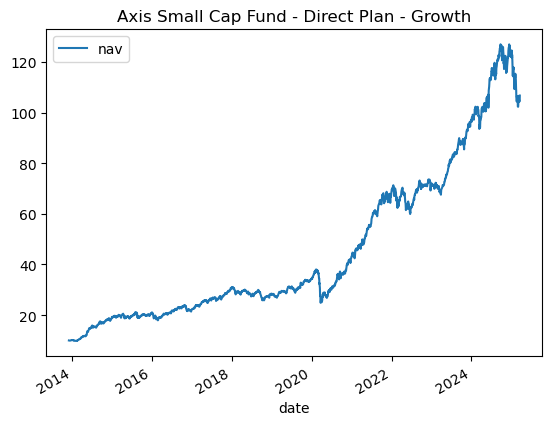

In [17]:
mutual_fund_code = '125354'
mutual_fund = 'Axis Small Cap Fund - Direct Plan - Growth'

df2 = mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()
df2['nav'] = df2['nav'].astype(float)
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')
df2 = df2.sort_values('date').reset_index(drop=True)
display(df2)
df2.plot(x='date', y='nav')
plt.title(mutual_fund)

### Updating code to create interactive Dropdown

In [18]:
pip install jupyter-dash

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jupyter-dash in d:\machine learning\anaconda and jupyter\lib\site-packages (0.4.2)



In [19]:
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc, html
from IPython.display import display
from datetime import datetime, timedelta
from jupyter_dash import JupyterDash

In [20]:
from dash.dependencies import Input, Output


In [21]:
mutual_fund_code = '125354'
mutual_fund = 'Axis Small Cap Fund - Direct Plan - Growth'

In [22]:
# Start Dash app
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)

# Layout with dropdown
app.layout = html.Div([
    html.H1(f"{mutual_fund} NAV Performance"),
    dcc.Dropdown(
        id="time_frame",
        options=[
            {"label": "1 Month", "value": "1M"},
            {"label": "6 Months", "value": "6M"},
            {"label": "1 Year", "value": "1Y"},
            {"label": "3 Years", "value": "3Y"},
            {"label": "Max", "value": "Max"},
        ],
        value="1Y",
        clearable=False
    ),
    dcc.Graph(id="nav_chart")
])


In [23]:
# Callback to update the chart
@app.callback(
    Output("nav_chart", "figure"),
    [Input("time_frame", "value")]
)
def update_chart(time_frame):
    today = datetime.today()
    time_frames = {"1M": 30, "6M": 6*30, "1Y": 365, "3Y": 3*365, "Max": None}

    if time_frame in time_frames and time_frame != "Max":
        start_date = today - timedelta(days=time_frames[time_frame])
        filtered_df = df[df["date"] >= start_date]
    else:
        filtered_df = df

    fig = px.line(filtered_df, x="date", y="nav", 
                  title=f"{mutual_fund} ({time_frame})",
                  labels={"nav": "NAV", "date": "Date"})
    return fig

# Run the app inline in the notebook
app.run_server(mode="inline", debug=True)

Dash is running on http://127.0.0.1:8050/



## **Portfolio Analysis**

In this section, we delve into the composition of the Axis Small Cap Mutual Fund's portfolio by examining its stock holdings and sector weightings. Using the fund’s ticker, we retrieve detailed data on the individual stocks it holds as well as the distribution across various industry sectors. This analysis helps us understand how diversified the portfolio.

### Top Stock Holdings

In [24]:
import requests

# URL of the JSON file
url = "https://raw.githubusercontent.com/NayakwadiS/Forecasting_Mutual_Funds/master/codes.json"

# Fetch and load JSON data
data = requests.get(url).json()

# Process the data: each item is a dictionary with one key-value pair (ticker: fund_name)
records = []
for item in data:
    for ticker, fund_name in item.items():
        records.append({"ticker": ticker, "fund_name": fund_name})


In [25]:
# Convert the records list into a DataFrame
ticker_symbols = pd.DataFrame(records)

In [26]:
ticker_symbols.head()

,ticker,fund_name
0,0P0000XVRM,Franklin India Liquid Super Institutional Dire...
1,0P0001I2M7,Franklin India Liquid Unclaimed Dividend Plan ...
2,0P00005UXL,Franklin India Liquid Institutional Weekly Div...
3,0P0001BA6F,Franklin India Liquid-Super Institutional Plan...
4,0P0001BA6E,Franklin India Liquid Super Institutional Dire...


In [27]:
# Filter funds containing 'small cap' (case-insensitive) in the fund_name
small_cap_funds = ticker_symbols[ticker_symbols["fund_name"].str.contains("Axis small cap fund direct growth", case=False, na=False)]
print(small_cap_funds)


          ticker                          fund_name
7565  0P00011MAX  Axis Small Cap Fund Direct Growth


ticker = 0P00011MAX

In [28]:
!pip install yahooquery

In [29]:
import yahooquery

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name 'df' is not defined



In [30]:
from yahooquery import Ticker
ticker = Ticker('0P00011MAX.BO')
ticker.fund_top_holdings

symbol                                holdingName  \
symbol        row                                                             
0P00011MAX.BO 0    BLUESTARCO.NS                              Blue Star Ltd   
              1    CHOLAHLDNG.BO       Cholamandalam Financial Holdings Ltd   
              2       BRIGADE.BO                    Brigade Enterprises Ltd   
              3          KIMS.BO  Krishna Institute of Medical Sciences Ltd   
              4        KAYNES.BO                Kaynes Technology India Ltd   
              5           CCL.BO                   CCL Products (India) Ltd   
              6    JBCHEPHARM.BO       J.B. Chemicals & Pharmaceuticals Ltd   
              7            NH.NS                   Narayana Hrudayalaya Ltd   
              8      HDFCBANK.NS                              HDFC Bank Ltd   
              9     POLICYBZR.BO                             PB Fintech Ltd   

                   holdingPercent  
symbol        row                  
0P00011MAX.BO 0          0.038672  
              1          0.029585  
              2          0.027841  
              3          0.026769  
              4          0.020460  
              5          0.019228  
              6          0.018948  
              7          0.017412  
              8          0.016814  
              9          0.016705

### Sector Holdings

,0P00011MAX.BO
0,
realestate,0.0562
consumer_cyclical,0.1224
basic_materials,0.1227
consumer_defensive,0.0552
technology,0.0827
communication_services,0.0094
financial_services,0.1992
utilities,0.0063
industrials,0.2134


<Axes: ylabel='0'>

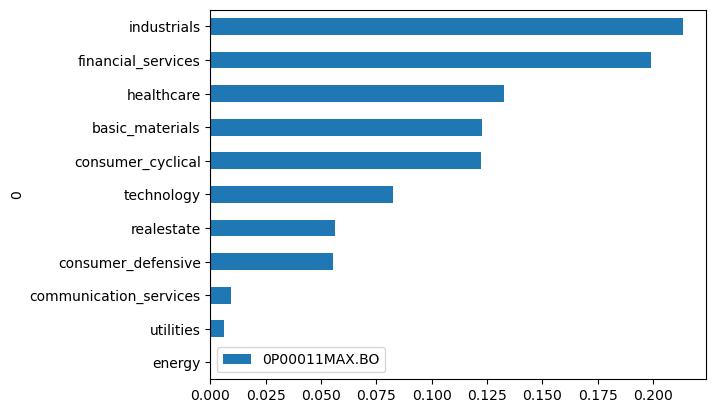

In [31]:
sector_weightings = ticker.fund_sector_weightings
display(sector_weightings)
sector_weightings.sort_values('0P00011MAX.BO',).plot(kind='barh')

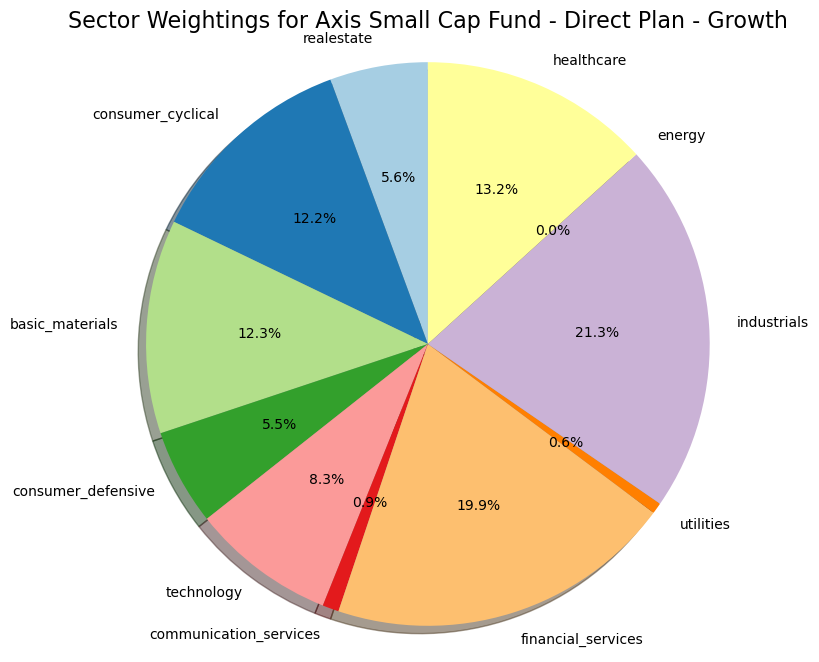

In [32]:
fund_name = "Axis Small Cap Fund - Direct Plan - Growth"

# Get the column name (there should be only one column with percentages)
col_name = sector_weightings.columns[0]

# Create a pie chart with enhanced styling
plt.figure(figsize=(8,8))
colors = plt.cm.Paired(range(len(sector_weightings)))  # Generate a color map

plt.pie(sector_weightings[col_name],
        labels=sector_weightings.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=colors)

plt.title(f"Sector Weightings for {fund_name}", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## **Growth Analysis**

In this section, we assess the fund's performance by calculating its absolute returns and Compound Annual Growth Rate (CAGR) over different time horizons. These metrics reveal both the total return over the period and the average annualized growth, offering a clear picture of the fund’s capital appreciation. Additionally, we compare these growth figures against the NIFTY Smallcap 100 index—a benchmark representing the small-cap market.

### Cumulative Returns Or Absolute Returns

The cumulative return is the aggregate effect of price changes on an investment's value over a defined timeframe. 

In [95]:
#Pull the mutual fund data
mutual_fund_code = '125354'
mutual_fund = 'Axis Small Cap Fund - Direct Plan - Growth'
start_date = pd.to_datetime('11-3-2022', format='%d-%m-%Y')
end_date = pd.to_datetime('11-3-2025', format='%d-%m-%Y')

df = mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()
df['nav'] = df['nav'].astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values('date')
df = df.query("date >= @start_date and date <=@end_date").reset_index(drop=True)

#Calculate cumulative returns 
df['daily_returns'] = df['nav'].pct_change()
df['cumulative_returns'] = (df['daily_returns']+1).cumprod()
df

,date,nav,dayChange,daily_returns,cumulative_returns
0,2022-03-11,65.37,0.41,NaN,NaN
1,2022-03-14,65.51,0.14,0.002142,1.002142
2,2022-03-15,65.08,-0.43,-0.006564,0.995564
3,2022-03-16,65.82,0.74,0.011371,1.006884
4,2022-03-17,66.61,0.79,0.012002,1.018969
...,...,...,...,...,...
736,2025-03-05,105.09,2.04,0.019796,1.607618
737,2025-03-06,106.15,1.06,0.010087,1.623834
738,2025-03-07,106.51,0.36,0.003391,1.629341
739,2025-03-10,105.38,-1.13,-0.010609,1.612054


If an investor had invested ₹1 three years ago, its value would now have been ₹1.60 with an **absolute growth of 60%**.

Similary we will count for last 3 years

In [34]:
from IPython.display import display

# Define time periods
time_periods = [1, 2, 3]
growth_data = []

for years in time_periods:
    target_date = start_date + pd.DateOffset(years=years)
    
    # Find the closest available date in the dataset
    closest_idx = (df['date'] - target_date).abs().idxmin()  
    closest_date = df.loc[closest_idx, 'date']
    
    # Get cumulative return at the closest available date
    value = df.loc[closest_idx, 'cumulative_returns']
    percentage_growth = (value - 1) * 100  # Convert to percentage
    
    growth_data.append([f"{years} Year", f"{percentage_growth:.2f}%", closest_date.strftime('%d-%m-%Y')])

# Create DataFrame
growth_df = pd.DataFrame(growth_data, columns=["Time Period", "Cumulative Growth (%)", "Actual Date Used"])

# Display the table
display(growth_df)

,Time Period,Cumulative Growth (%),Actual Date Used
0,1 Year,7.85%,10-03-2023
1,2 Year,49.82%,11-03-2024
2,3 Year,60.56%,11-03-2025


### CAGR

CAGR (Compound Annual Growth Rate) is the average annual growth rate of an investment over a period, assuming compounding.

In [35]:
n_years = 3
((df['nav'].iloc[-1]/df['nav'].iloc[0]) ** (1/n_years) - 1) * 100

17.097721791870903

CAGR for Axis Small Cap Mutual Fund for last three years is 17.09%

### Benchmark Comaparision

We will compare our fund with the performance of Nifty Small Cap 100 Index.

In [36]:
import pandas as pd

# Define the file path
csv_path = r"D:\NISM\MF Project\NIFTY SMALLCAP 100_Historical.csv"

# Load the CSV into a DataFrame
nifty_smallcap = pd.read_csv(csv_path)

In [37]:
nifty_smallcap.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY SMALLCAP 100,11-Mar-25,15009.60,15134.55,14869.10,15075.90
1,NIFTY SMALLCAP 100,10-Mar-25,15525.45,15663.90,15131.85,15198.15
2,NIFTY SMALLCAP 100,07-Mar-25,15420.15,15614.15,15379.25,15504.30
3,NIFTY SMALLCAP 100,06-Mar-25,15342.45,15457.55,15277.05,15400.35
4,NIFTY SMALLCAP 100,05-Mar-25,14764.65,15211.75,14764.65,15199.10


In [38]:
nifty_smallcap[nifty_smallcap["Date"]=="10 Mar 2022"]

,Index Name,Date,Open,High,Low,Close


**Preprocessing of Indices data**

In [40]:
# Ensure 'Date' column is in datetime format with correct format
nifty_smallcap["Date"] = pd.to_datetime(nifty_smallcap["Date"], format="%d-%b-%y")

# Sort data by date to ensure calculations are correct
nifty_smallcap = nifty_smallcap.sort_values("Date")

In [41]:
# Calculate daily percentage change
nifty_smallcap["daily_change"] = nifty_smallcap["Close"].pct_change()

# Calculate cumulative returns
nifty_smallcap["cumulative_change"] = (1 + nifty_smallcap["daily_change"]).cumprod()

In [42]:
nifty_smallcap.head()

,Index Name,Date,Open,High,Low,Close,daily_change,cumulative_change
746,NIFTY SMALLCAP 100,2022-03-10,10168.15,10175.45,10010.10,10066.50,NaN,NaN
745,NIFTY SMALLCAP 100,2022-03-11,10055.15,10198.65,10018.40,10158.40,0.009129,1.009129
744,NIFTY SMALLCAP 100,2022-03-14,10197.70,10224.45,10092.35,10180.35,0.002161,1.011310
743,NIFTY SMALLCAP 100,2022-03-15,10240.40,10270.80,9995.35,10036.60,-0.014120,0.997030
742,NIFTY SMALLCAP 100,2022-03-16,10175.00,10201.25,10110.80,10154.20,0.011717,1.008712


In [43]:
latest_date = pd.to_datetime("2025-03-11")

# Function to calculate absolute returns and CAGR
def calculate_returns(df, value_col, date_col):
    results = {}
    for years in [1, 2, 3]:  # For 1, 2, and 3 years
        start_date = latest_date - pd.DateOffset(years=years)

        # Get the closest available date for start and end
        start_value = df[df[date_col] <= start_date][value_col].iloc[-1] if not df[df[date_col] <= start_date].empty else None
        end_value = df[df[date_col] == latest_date][value_col].iloc[0] if not df[df[date_col] == latest_date].empty else None

        if start_value is not None and end_value is not None:
            abs_return = ((end_value - start_value) / start_value) * 100  # Convert to %
            cagr = (((end_value / start_value) ** (1 / years)) - 1) * 100  # Convert to %
        else:
            abs_return, cagr = None, None

        results[f"Abs Return {years}Y (%)"] = f"{abs_return:.2f}%" if abs_return is not None else "N/A"
        results[f"CAGR {years}Y (%)"] = f"{cagr:.2f}%" if cagr is not None else "N/A"

    return results

# Calculate for Nifty Smallcap 100 (using 'Close' column)
nifty_returns = calculate_returns(nifty_smallcap, "Close", "Date")

# Calculate for Mutual Fund NAV (using 'nav' column)
mf_returns = calculate_returns(df, "nav", "date")

In [44]:
comparison_df = pd.DataFrame([nifty_returns, mf_returns], index=["Nifty Smallcap 100", "Mutual Fund"])
comparison_df

,Abs Return 1Y (%),CAGR 1Y (%),Abs Return 2Y (%),CAGR 2Y (%),Abs Return 3Y (%),CAGR 3Y (%)
Nifty Smallcap 100,-2.08%,-2.08%,61.64%,27.14%,48.41%,14.07%
Mutual Fund,7.17%,7.17%,48.88%,22.02%,60.56%,17.10%


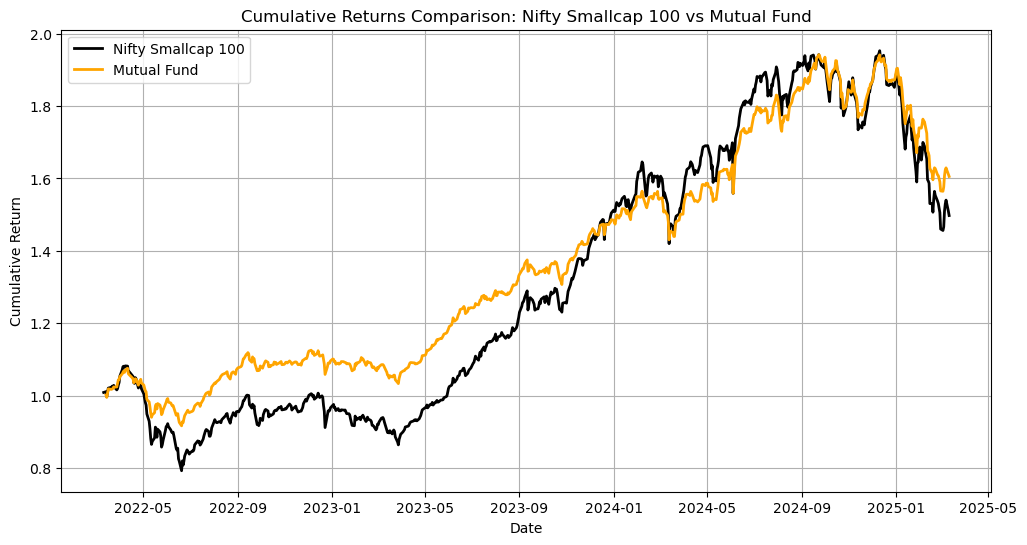

In [46]:
start_date = pd.to_datetime("2022-03-10")
end_date = pd.to_datetime("2025-03-11")
nifty_filtered = nifty_smallcap[(nifty_smallcap["Date"] >= start_date) & (nifty_smallcap["Date"] <= end_date)]
mf_filtered = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(nifty_filtered["Date"], nifty_filtered["cumulative_change"], label="Nifty Smallcap 100", color="black", linewidth=2)
plt.plot(mf_filtered["date"], mf_filtered["cumulative_returns"], label="Mutual Fund", color="orange", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns Comparison: Nifty Smallcap 100 vs Mutual Fund")
plt.legend()
plt.grid(True)
plt.show()

**Summary:**

Over 1 year, the mutual fund gained 7.17% versus a -2.08% decline for Nifty Smallcap 100, highlighting short-term resilience. Over 2 years the index surged 61.64% (27.14% CAGR), but over 3 years the fund’s steady 60.56% return (17.10% CAGR) outperformed the index’s 48.41% (14.07% CAGR), indicating **more consistent long-term growth.**

## **Volatility Analysis**

This section evaluates the risk profile of the Axis Small Cap Mutual Fund by measuring its volatility through standard deviation and maximum drawdown. These metrics are compared with the Nifty 50—typically a safer, large-cap benchmark—and the Nifty Small Cap 100, which represents the broader small-cap market. This comparison highlights how the fund's active management affects its risk relative to both a conservative benchmark and its small-cap benchmark.

### Standard Deviation

Standard deviation measure the volatility of the asset. It quantifies how much the returns deviate from their mean, providing a unit-free measure of risk that enables comparison across different instruments such as the mutual fund, Nifty 50, and Nifty Small Cap 100.

In [47]:
#We will calculate the standard deviation of Nifty 50, Nifty Small Cap 100 and our mutual fund to get fair comparision

**Calculating Std of Nifty 50 over last 3 years**

In [48]:
csv_path = r"D:\NISM\MF Project\NIFTY 50_Historical.csv"

nifty50 = pd.read_csv(csv_path)

In [51]:
nifty50.head()

,Index Name,Date,Open,High,Low,Close,Daily Change,Cumulative Change
0,NIFTY 50,2022-03-10,16757.10,16757.30,16447.90,16594.90,NaN,NaN
1,NIFTY 50,2022-03-11,16528.80,16694.40,16470.90,16630.45,0.002142,1.002142
2,NIFTY 50,2022-03-14,16633.70,16887.95,16606.50,16871.30,0.014482,1.016656
3,NIFTY 50,2022-03-15,16900.65,16927.75,16555.00,16663.00,-0.012346,1.004104
4,NIFTY 50,2022-03-16,16876.65,16987.90,16837.85,16975.35,0.018745,1.022926


In [54]:
# Calculate the standard deviation
std_Nifty50 = nifty50['Daily Change'].std()

print("Standard Deviation of Nifty 50 :", std_Nifty50)

Standard Deviation of Nifty 50 : 0.008280933255306553


**Calculating std of Nifty Small Cap Indices**

In [55]:
nifty_smallcap.head()

,Index Name,Date,Open,High,Low,Close,daily_change,cumulative_change
746,NIFTY SMALLCAP 100,2022-03-10,10168.15,10175.45,10010.10,10066.50,NaN,NaN
745,NIFTY SMALLCAP 100,2022-03-11,10055.15,10198.65,10018.40,10158.40,0.009129,1.009129
744,NIFTY SMALLCAP 100,2022-03-14,10197.70,10224.45,10092.35,10180.35,0.002161,1.011310
743,NIFTY SMALLCAP 100,2022-03-15,10240.40,10270.80,9995.35,10036.60,-0.014120,0.997030
742,NIFTY SMALLCAP 100,2022-03-16,10175.00,10201.25,10110.80,10154.20,0.011717,1.008712


In [58]:
std_smallcap = nifty_smallcap["daily_change"].std()
print("Standard Deviation of Axis Small Cap Mutual Fund:", std_smallcap )

Standard Deviation of Axis Small Cap Mutual Fund: 0.012459615977281312


**Calculating std of Axis Small Cap Mutual Fund**

In [59]:
mf_std = df["daily_returns"].std()
print("Standard Deviation of Axis Small Cap Mutual Fund:", mf_std )

Standard Deviation of Axis Small Cap Mutual Fund: 0.008257141439044838


In [60]:
data = {
    "Index/Fund": ["Nifty 50", "Axis Small Cap Mutual Fund", "Nifty Smallcap 100"],
    "Standard Deviation": [std_Nifty50, mf_std, std_smallcap]
}

comparison_df1 = pd.DataFrame(data)
display(comparison_df1)


,Index/Fund,Standard Deviation
0,Nifty 50,0.008281
1,Axis Small Cap Mutual Fund,0.008257
2,Nifty Smallcap 100,0.012460


In [61]:
df.head()

,date,nav,dayChange,daily_returns,cumulative_returns
0,2022-03-11,65.37,0.41,NaN,NaN
1,2022-03-14,65.51,0.14,0.002142,1.002142
2,2022-03-15,65.08,-0.43,-0.006564,0.995564
3,2022-03-16,65.82,0.74,0.011371,1.006884
4,2022-03-17,66.61,0.79,0.012002,1.018969


The Nifty 50 and Axis Small Cap Mutual Fund have very similar daily volatility—around 0.83%. In contrast, the Nifty Smallcap 100 exhibits a noticeably higher volatility of about 1.25%, highlighting the inherent risk and potential for larger swings in returns typically seen in small cap stocks. 

This result shows our mutual fund may be employing active risk management—like diversification, hedging, or selective stock picking—to dampen daily swings even if it is investing in small caps. 

But, a daily standard deviation doesn’t always capture longer-term risks (such as drawdowns or tail events), so while the numbers look comparable on a day-to-day basis, the overall risk profile may still differ significantly.

### Maximum Downturn

This metric measures the largest peak-to-trough decline in the fund's value during a period. It provides insight into the potential loss an investor might face during adverse market conditions.

In [71]:
def calculate_max_drawdown(cum_returns):
    
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max
    return drawdown.min()

# Calculate maximum drawdown for each dataset:
# For Axis Mutual Fund data (df), we use the 'cumulative_returns' column
max_dd_mf = calculate_max_drawdown(df['cumulative_returns'])

# For Nifty 50 data (nifty50), we assume the cumulative returns are in the 'cumulative_change' column
max_dd_nifty50 = calculate_max_drawdown(nifty50['Cumulative Change'])

# For Nifty Smallcap 100 data (nifty_smallcap), we also assume the cumulative returns are in 'cumulative_change'
max_dd_nifty_smallcap = calculate_max_drawdown(nifty_smallcap['cumulative_change'])

# Create a summary DataFrame to compare the results
summary_data = {
    'Index/Fund': ['Axis Mutual Fund', 'Nifty 50', 'Nifty Smallcap 100'],
    'Max Drawdown (%)': [f"{max_dd_mf*100:.2f}%", f"{max_dd_nifty50*100:.2f}%", f"{max_dd_nifty_smallcap*100:.2f}%"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Index/Fund,Max Drawdown (%)
0,Axis Mutual Fund,-19.43%
1,Nifty 50,-15.77%
2,Nifty Smallcap 100,-26.74%


Nifty Smallcap 100 recorded the highest maximum drawdown at -26.74%, highlighting its elevated volatility and risk exposure. In contrast, Nifty 50 showed the lowest drawdown at -15.77%, reflecting the relative stability of large-cap stocks even during downturns. The Axis Mutual Fund, with a drawdown of -19.43%, appears to strike a balance by mitigating risk better than the pure small-cap index while still capturing some of its growth potential. 

For investors, Nifty 50 remains the safest option, but Axis Mutual Fund offers a balanced approach—providing small-cap exposure with better risk control than directly investing in the Nifty Smallcap 100 index.

## **Peer Comparision**

### Identifying Peers

We will select peers of Axis Small Cap Direct Growth fund.

In [73]:
small_cap_schemes

{'105804': 'Aditya Birla Sun Life Small Cap Fund - GROWTH',
 '119556': 'Aditya Birla Sun Life Small Cap Fund - Growth - Direct Plan',
 '119557': 'Aditya Birla Sun Life Small Cap Fund -Direct - IDCW',
 '105805': 'Aditya Birla Sun Life Small Cap Fund -Regular - IDCW',
 '125354': 'Axis Small Cap Fund - Direct Plan - Growth',
 '125351': 'Axis Small Cap Fund - Direct Plan - IDCW',
 '125350': 'Axis Small Cap Fund - Regular Plan - Growth',
 '125352': 'Axis Small Cap Fund - Regular Plan - IDCW',
 '147946': 'BANDHAN SMALL CAP FUND - DIRECT PLAN GROWTH',
 '147943': 'BANDHAN SMALL CAP FUND - DIRECT PLAN IDCW',
 '147944': 'BANDHAN SMALL CAP FUND - REGULAR PLAN GROWTH',
 '147945': 'BANDHAN SMALL CAP FUND - REGULAR PLAN IDCW',
 '145678': 'BANK OF INDIA Small Cap Fund Direct Plan Growth',
 '145675': 'BANK OF INDIA Small Cap Fund Direct Plan IDCW',
 '145677': 'BANK OF INDIA Small Cap Fund Regular Plan Growth',
 '145676': 'BANK OF INDIA Small Cap Fund Regular Plan IDCW',
 '152128': 'Baroda BNP Paribas 

**Selected Mutual Funds**

Aditya Birla - '119556', Bank Of India - '145678', Motilal Oswal - '152237', HDFC - '130503, LIC - '152004'

In [85]:
#Pull the mutual fund data
mutual_fund_code = '119556'

start_date = pd.to_datetime('11-3-2022', format='%d-%m-%Y')
end_date = pd.to_datetime('11-3-2025', format='%d-%m-%Y')

df_adityabirla = mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()
df_adityabirla['nav'] = df_adityabirla['nav'].astype(float)
df_adityabirla['date'] = pd.to_datetime(df_adityabirla['date'], format='%d-%m-%Y')
df_adityabirla = df_adityabirla.sort_values('date')
df_adityabirla = df_adityabirla.query("date >= @start_date and date <=@end_date").reset_index(drop=True)

#Calculate cumulative returns 
df_adityabirla['daily_returns'] = df_adityabirla['nav'].pct_change()
df_adityabirla['cumulative_returns'] = (df_adityabirla['daily_returns']+1).cumprod()
df_adityabirla

,date,nav,dayChange,daily_returns,cumulative_returns
0,2022-03-11,54.5147,-0.0528,NaN,NaN
1,2022-03-14,54.5585,0.0438,0.000803,1.000803
2,2022-03-15,54.4355,-0.1230,-0.002254,0.998547
3,2022-03-16,55.1312,0.6957,0.012780,1.011309
4,2022-03-17,55.9271,0.7959,0.014436,1.025909
...,...,...,...,...,...
734,2025-03-05,81.2130,2.0211,0.025522,1.489745
735,2025-03-06,82.3757,1.1627,0.014317,1.511073
736,2025-03-07,82.6435,0.2678,0.003251,1.515986
737,2025-03-10,81.2743,-1.3692,-0.016568,1.490869


In [86]:
# Define mutual fund scheme codes for each peer
peer_codes = {
    "Aditya Birla": "119556",
    "Bank Of India": "145678",
    "Motilal Oswal": "152237",
    "HDFC": "130503",
    "LIC": "152004"
}

# Define the date range
start_date = pd.to_datetime('11-3-2022', format='%d-%m-%Y')
end_date = pd.to_datetime('11-3-2025', format='%d-%m-%Y')

# Dictionary to store data for each fund
peer_data = {}

# Loop over each fund, fetch data, calculate daily & cumulative returns, then store the result
for fund_name, scheme_code in peer_codes.items():
    print(f"Fetching data for {fund_name} (Scheme Code: {scheme_code})...")
    df_fund = mf.get_scheme_historical_nav(scheme_code, as_Dataframe=True).reset_index()
    df_fund['nav'] = df_fund['nav'].astype(float)
    df_fund['date'] = pd.to_datetime(df_fund['date'], format='%d-%m-%Y')
    df_fund = df_fund.sort_values('date').reset_index(drop=True)
    df_fund = df_fund.query("date >= @start_date and date <= @end_date").reset_index(drop=True)
    
    # Calculate daily returns and cumulative returns
    df_fund['daily_returns'] = df_fund['nav'].pct_change()
    df_fund['cumulative_returns'] = (df_fund['daily_returns'] + 1).cumprod()
    
    # Store in dictionary
    peer_data[fund_name] = df_fund
    
    # Optional: Pause to avoid overwhelming the API
    time.sleep(2)

# Display a sample of each fund's data
for fund_name, df_fund in peer_data.items():
    print(f"\nData for {fund_name}:")
    print(df_fund.head())


Fetching data for Aditya Birla (Scheme Code: 119556)...
Fetching data for Bank Of India (Scheme Code: 145678)...
Fetching data for Motilal Oswal (Scheme Code: 152237)...
Fetching data for HDFC (Scheme Code: 130503)...
Fetching data for LIC (Scheme Code: 152004)...

Data for Aditya Birla:
        date      nav  dayChange  daily_returns  cumulative_returns
0 2022-03-11  54.5147    -0.0528            NaN                 NaN
1 2022-03-14  54.5585     0.0438       0.000803            1.000803
2 2022-03-15  54.4355    -0.1230      -0.002254            0.998547
3 2022-03-16  55.1312     0.6957       0.012780            1.011309
4 2022-03-17  55.9271     0.7959       0.014436            1.025909

Data for Bank Of India:
        date    nav  dayChange  daily_returns  cumulative_returns
0 2022-03-11  26.72       0.21            NaN                 NaN
1 2022-03-14  26.84       0.12       0.004491            1.004491
2 2022-03-15  26.59      -0.25      -0.009314            0.995135
3 2022-03-16  

### Growth Comparision

In [97]:
def compute_returns(fund_df, period_years=3):
    # Standardize column names to lowercase so that "date" and "cumulative_returns" exist
    fund_df.columns = [str(col).lower() for col in fund_df.columns]
    
    # Ensure data is sorted by date in ascending order
    fund_df = fund_df.sort_values("date").reset_index(drop=True)
    
    # Fill missing values in cumulative_returns (first row might be NaN) with 1
    fund_df["cumulative_returns"] = fund_df["cumulative_returns"].fillna(1)
    
    start_value = fund_df["cumulative_returns"].iloc[0]
    end_value = fund_df["cumulative_returns"].iloc[-1]
    
    # Absolute return: (end_value / start_value) - 1
    absolute_return = (end_value / start_value) - 1
    
    # CAGR: (end_value / start_value)^(1/period_years) - 1
    cagr = (end_value / start_value) ** (1 / period_years) - 1
    
    return absolute_return, cagr

# Create a list to hold the summary results
summary_list = []

# Calculate for Axis Mutual Fund (data stored in df)
abs_return_axis, cagr_axis = compute_returns(df, period_years=3)
summary_list.append({
    "Fund": "Axis Mutual Fund",
    "Absolute Return (%)": f"{abs_return_axis * 100:.2f}%",
    "CAGR (%)": f"{cagr_axis * 100:.2f}%"
})

# Calculate for each peer fund in the peer_data dictionary
for fund_name, fund_df in peer_data.items():
    abs_return_peer, cagr_peer = compute_returns(fund_df, period_years=3)
    summary_list.append({
        "Fund": fund_name,
        "Absolute Return (%)": f"{abs_return_peer * 100:.2f}%",
        "CAGR (%)": f"{cagr_peer * 100:.2f}%"
    })

# Convert the summary list into a DataFrame for comparison
summary_df2 = pd.DataFrame(summary_list)

print(summary_df2)

               Fund Absolute Return (%) CAGR (%)
0  Axis Mutual Fund              60.56%   17.10%
1      Aditya Birla              48.32%   14.04%
2     Bank Of India              63.44%   17.79%
3     Motilal Oswal              20.42%    6.39%
4              HDFC              69.46%   19.22%
5               LIC              26.72%    8.21%


HDFC stands out with a robust 69.46% absolute return and a 19.22% CAGR, signaling superior performance and strong capital appreciation potential. Both Axis Mutual Fund and Bank of India offer compelling growth, each delivering returns in the 60–63% range with high-teens CAGR, making them attractive long-term choices. Aditya Birla provides a moderate yet balanced risk–return profile that could suit conservative portfolios. In contrast, the notably lower performance of Motilal Oswal (20.42% absolute, 6.39% CAGR) and LIC (26.72% absolute, 8.21% CAGR) may be from the fact that these funds started recently.

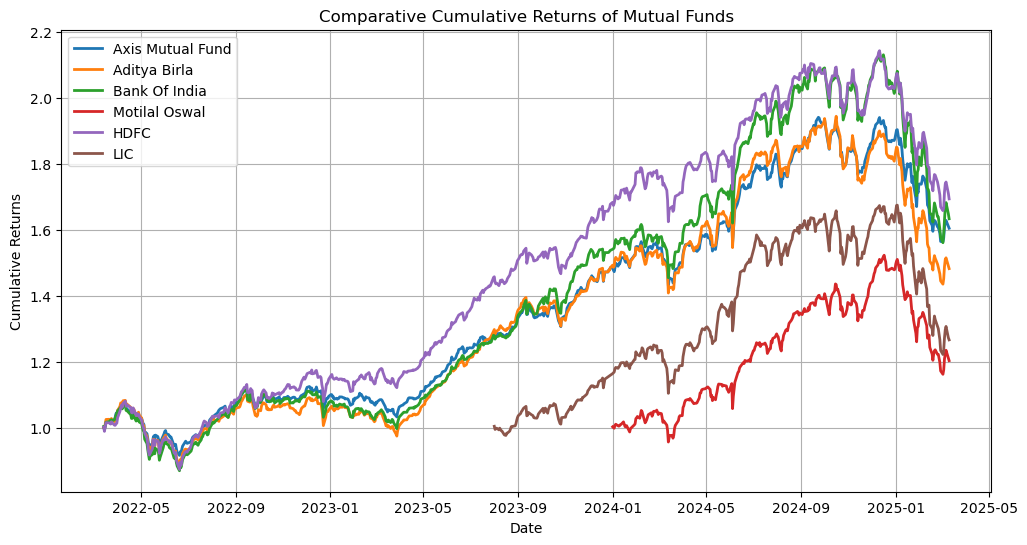

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Axis Mutual Fund (stored in df)
plt.plot(df['date'], df['cumulative_returns'], label="Axis Mutual Fund", linewidth=2)

# Loop through each peer fund and plot its cumulative returns
for fund_name, fund_df in peer_data.items():
    plt.plot(fund_df['date'], fund_df['cumulative_returns'], label=fund_name, linewidth=2)

plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Comparative Cumulative Returns of Mutual Funds")
plt.legend()
plt.grid(True)
plt.show()


### Risk and Return

#### Sharpe Ratio

Sharpe Ratio of a mutual fund reveals its potential risk-adjusted returns. Risk-adjusted returns are the returns earned by an investment over the returns generated by any risk-free asset such as a fixed deposit. However, higher returns indicate extra risk. A higher Sharpe Ratio means greater returns from an investment but with a higher risk level. Therefore, it justifies the underlying volatility of the funds. The investors aiming for higher returns will have to invest in funds with higher risk factors.

We are going to use absolute returns of last year as fund returns and 6% as risk free rate of return.

In [106]:
# Define the end date and derive last year's start date
end_date = pd.to_datetime("2025-03-11")
last_year_start = end_date - pd.DateOffset(years=3)

def compute_last_year_metrics(fund_df):
    # Standardize column names to lowercase
    fund_df.columns = [str(col).lower() for col in fund_df.columns]
    
    # Ensure the 'date', 'daily_returns' and 'cumulative_returns' columns exist
    if "date" not in fund_df.columns:
        raise KeyError("The 'date' column is missing in the DataFrame.")
    if "daily_returns" not in fund_df.columns:
        # Calculate daily returns from nav if not already present
        fund_df["daily_returns"] = fund_df["nav"].pct_change()
    if "cumulative_returns" not in fund_df.columns:
        fund_df["cumulative_returns"] = (1 + fund_df["daily_returns"]).cumprod()
    
    # Filter data for the last year (from last_year_start to end_date)
    last_year_df = fund_df[(fund_df["date"] >= last_year_start) & (fund_df["date"] <= end_date)].copy()
    
    # If there's not enough data, return NaNs
    if len(last_year_df) < 2:
        return np.nan, np.nan, np.nan
    
    # Fill missing cumulative_returns (if any) with 1
    last_year_df["cumulative_returns"] = last_year_df["cumulative_returns"].fillna(1)
    
    # Compute absolute return over the last year using cumulative returns
    start_value = last_year_df["cumulative_returns"].iloc[0]
    end_value = last_year_df["cumulative_returns"].iloc[-1]
    absolute_return = (end_value / start_value) - 1
    
    # Compute annualized volatility from daily returns
    daily_std = last_year_df["daily_returns"].std()
    annual_volatility = daily_std * np.sqrt(252)
    
    # Compute Sharpe Ratio using absolute return as fund return and 6% annual risk-free rate
    sharpe_ratio = (absolute_return - 0.06) / annual_volatility if annual_volatility != 0 else np.nan
    
    return absolute_return, annual_volatility, sharpe_ratio

# Create a summary list for all funds
summary_list = []

# For Axis Mutual Fund (data stored in df)
abs_return_axis, vol_axis, sharpe_axis = compute_last_year_metrics(df)
summary_list.append({
    "Fund": "Axis Mutual Fund",
    "Last Year Absolute Return (%)": f"{abs_return_axis * 100:.2f}%" if not np.isnan(abs_return_axis) else "N/A",
    "Annual Volatility (%)": f"{vol_axis * 100:.2f}%" if not np.isnan(vol_axis) else "N/A",
    "Sharpe Ratio": f"{sharpe_axis:.2f}" if not np.isnan(sharpe_axis) else "N/A"
})

# For each peer fund stored in peer_data (a dictionary with fund name keys)
for fund_name, fund_df in peer_data.items():
    abs_return_peer, vol_peer, sharpe_peer = compute_last_year_metrics(fund_df)
    summary_list.append({
        "Fund": fund_name,
        "Last Year Absolute Return (%)": f"{abs_return_peer * 100:.2f}%" if not np.isnan(abs_return_peer) else "N/A",
        "Annual Volatility (%)": f"{vol_peer * 100:.2f}%" if not np.isnan(vol_peer) else "N/A",
        "Sharpe Ratio": f"{sharpe_peer:.2f}" if not np.isnan(sharpe_peer) else "N/A"
    })

# Convert the summary list into a DataFrame
summary_df = pd.DataFrame(summary_list)

# Display the summary DataFrame
print(summary_df)


               Fund Last Year Absolute Return (%) Annual Volatility (%)  \
0  Axis Mutual Fund                        60.56%                13.11%   
1      Aditya Birla                        48.32%                15.36%   
2     Bank Of India                        63.44%                16.68%   
3     Motilal Oswal                        20.42%                18.65%   
4              HDFC                        69.46%                15.51%   
5               LIC                        26.72%                20.34%   

  Sharpe Ratio  
0         4.16  
1         2.75  
2         3.44  
3         0.77  
4         4.09  
5         1.02  


The Sharpe ratio measures the excess return (i.e. return above a risk-free rate) per unit of risk (volatility). In simple terms, it tells you how well a fund compensates you for the risk you’re taking. A higher Sharpe ratio means that for each unit of volatility, you are receiving more return, which is generally considered better. Conversely, a negative Sharpe ratio indicates that the fund’s return is less than the risk-free rate, suggesting it may not be worth the risk.

Axis Mutual Fund and HDFC excel with high returns (60.56% and 69.46%), low volatility (13.11% and 15.51%), and strong Sharpe ratios (4.16 and 4.09).  
Bank Of India also performs well, achieving a 63.44% return with a Sharpe ratio of 3.44.  
In contrast, Aditya Birla, Motilal Oswal, and LIC deliver lower returns and weaker risk-adjusted metrics.  
Overall, Axis, HDFC, and Bank Of India present the most attractive risk-return profiles for investors.

#### Sortino Ratio

The Sortino ratio is a risk-adjusted performance measure, similar to the Sharpe ratio, but it focuses on downside risk (the standard deviation of negative returns) rather than total volatility. 

In [107]:
# Assume a 6% annual risk-free rate and convert it to a daily rate (252 trading days)
annual_rf = 0.06
daily_rf = (1 + annual_rf)**(1/252) - 1

def compute_sortino_ratio(daily_returns, rf=daily_rf):
    """
    Compute the annualized Sortino ratio using daily returns.
    The Sortino ratio is calculated as:
      Sortino = (mean(daily_return - rf)) / (downside deviation)
    where downside deviation is the standard deviation of returns below the risk-free rate.
    The result is then annualized by multiplying by sqrt(252).
    """
    # Drop NaN values
    daily_returns = daily_returns.dropna()
    
    # Compute excess returns over the risk-free rate
    excess_returns = daily_returns - rf
    
    # Consider only returns below the risk-free rate (negative excess returns)
    negative_excess = excess_returns[excess_returns < 0]
    
    # Compute downside deviation: sqrt(mean(square(negative_excess)))
    downside_deviation = np.sqrt((negative_excess ** 2).mean()) if len(negative_excess) > 0 else np.nan
    
    # Compute mean excess return
    mean_excess_return = excess_returns.mean()
    
    # Calculate daily Sortino ratio (handle division by zero)
    sortino_daily = mean_excess_return / downside_deviation if downside_deviation != 0 else np.nan
    
    # Annualize the Sortino ratio using sqrt(252)
    sortino_annual = sortino_daily * np.sqrt(252)
    return sortino_annual

# Calculate the Sortino ratio for Axis Mutual Fund (data stored in df)
axis_sortino = compute_sortino_ratio(df["daily_returns"], rf=daily_rf)
print("Axis Mutual Fund Sortino Ratio (annualized):", axis_sortino)

# Calculate Sortino ratios for each peer fund in the peer_data dictionary
sortino_peers = {}
for fund_name, fund_df in peer_data.items():
    sortino_peers[fund_name] = compute_sortino_ratio(fund_df["daily_returns"], rf=daily_rf)
    print(f"{fund_name} Sortino Ratio (annualized):", sortino_peers[fund_name])

# Create a summary DataFrame for all funds
summary_list = []
summary_list.append({
    "Fund": "Axis Mutual Fund",
    "Sortino Ratio": f"{axis_sortino:.2f}" if not np.isnan(axis_sortino) else "N/A"
})
for fund_name, sortino in sortino_peers.items():
    summary_list.append({
        "Fund": fund_name,
        "Sortino Ratio": f"{sortino:.2f}" if not np.isnan(sortino) else "N/A"
    })

summary_df4 = pd.DataFrame(summary_list)
print("\nSummary of Annualized Sortino Ratios:")
print(summary_df4)


Axis Mutual Fund Sortino Ratio (annualized): 0.7362489005211522
Aditya Birla Sortino Ratio (annualized): 0.4749052704297027
Bank Of India Sortino Ratio (annualized): 0.6206798572943115
Motilal Oswal Sortino Ratio (annualized): 0.5197728759725944
HDFC Sortino Ratio (annualized): 0.7117599059891062
LIC Sortino Ratio (annualized): 0.44852041711136903

Summary of Annualized Sortino Ratios:
               Fund Sortino Ratio
0  Axis Mutual Fund          0.74
1      Aditya Birla          0.47
2     Bank Of India          0.62
3     Motilal Oswal          0.52
4              HDFC          0.71
5               LIC          0.45


Axis Mutual Fund and HDFC lead with Sortino ratios of 0.74 and 0.71, indicating superior downside protection and robust risk-adjusted returns. Bank of India and Motilal Oswal are moderate performers, while Aditya Birla and LIC trail with ratios of 0.47 and 0.45, suggesting they are more vulnerable to downside risk.